In [5]:
import clip
import json
import torch
import pandas
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

device = "cuda" if torch.cuda.is_available() else "cpu"
modelCLIP, preprocess = clip.load("ViT-B/32", device=device)

56359
24153


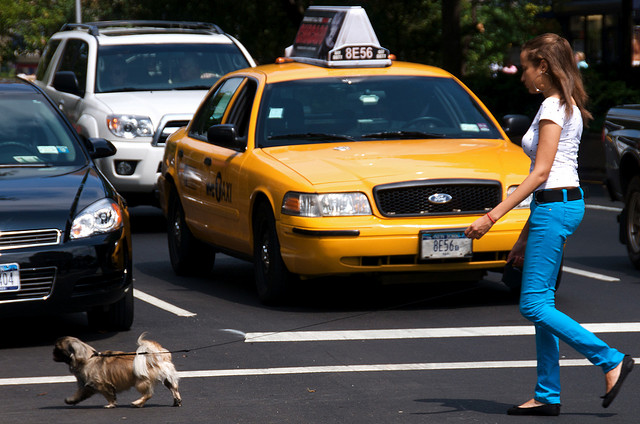

224
<class 'int'>


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 4 is not equal to len(dims) = 3

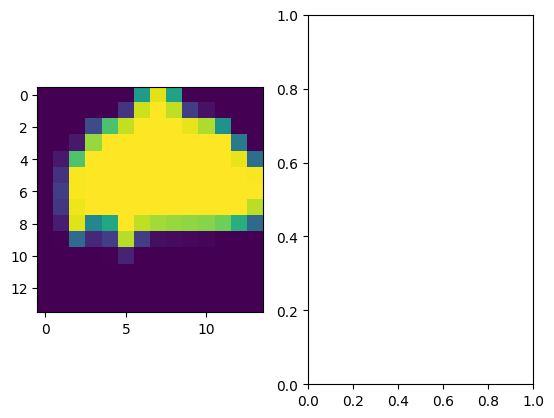

In [7]:
from RefcocogDataset import RefcocogDataset
from torch.utils.data import DataLoader

dataset = RefcocogDataset("../Dataset/refcocog", split="train", transform=preprocess)
train, val = dataset.splitTrainVal([0.7, 0.3])
train_dataloader = DataLoader(train)
print(len(train))
print(len(val))

train_image, train_bbox = next(iter(train_dataloader))
display(dataset.getImage(train_image))
plt.subplot(1, 2, 1)
plt.imshow(dataset.computeGroundTruth(train_image))
plt.subplot(1, 2, 2)
plt.imshow(train_image['image'])

In [28]:
BASE_PATH = "../Dataset/refcocog/"
BASE_IMG = BASE_PATH + "images/"
annotations = pandas.read_pickle(BASE_PATH + "annotations/refs(umd).p")

ann_dt = pandas.DataFrame.from_records(annotations).filter(items=["image_id", "split", "sentences", "ann_id"])
display(ann_dt[ann_dt.split == 'train'])

instances = json.load(open(BASE_PATH + "annotations/instances.json", 'r'))
print(instances.keys())
instances_dt = pandas.DataFrame.from_records(instances['annotations'])
display(instances_dt)

print(instances_dt['bbox'].max())

images_dt = pandas.DataFrame.from_records(instances['images'])
display(images_dt)


train_ann = [ann for ann in annotations if ann['split'] == 'train']
test_ann = [ann for ann in annotations if ann['split'] == 'test']

,image_id,split,sentences,ann_id
5023,519404,train,"[{'tokens': ['two', 'woman', 'one', 'in', 'bla...",1241542
5024,181828,train,"[{'tokens': ['a', 'tv', 'with', 'a', 'woman', ...",33583
5025,38850,train,"[{'tokens': ['a', 'young', 'boy', 'doing', 'a'...",442348
5026,393325,train,"[{'tokens': ['a', 'long', '-', 'horn', ',', 'l...",71545
5027,289971,train,"[{'tokens': ['the', 'woman', 'in', 'black', 'd...",209158
...,...,...,...,...
49817,426282,train,"[{'tokens': ['blue', 'and', 'white', 'train'],...",366955
49818,365259,train,"[{'tokens': ['man', 'in', 'black', 'shirt', 'h...",481913
49819,3518,train,"[{'tokens': ['a', 'long', 'banana'], 'raw': 'a...",1042682
49820,302199,train,"[{'tokens': ['a', 'guy', 'in', 'black', 'jacke...",473946


dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])


,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[21.11, 239.09, 16.31, 274.6, 198.65, 349.45,...",48667.84090,0,131074,"[16.31, 141.21, 421.29, 208.24]",65,318235
1,"[[474.17, 215.44, 342.4, 201.98, 317.39, 195.2...",10501.20610,0,131074,"[299.12, 136.58, 241.7, 88.85]",65,319598
2,"[[326.4, 318.87, 320.05, 305.25, 323.68, 274.8...",3110.01535,0,131074,"[320.05, 248.05, 79.89, 83.07]",31,1174042
3,"[[283.47, 194.46, 271.43, 192.79, 274.44, 189....",39.81120,0,131074,"[271.43, 189.61, 14.22, 4.85]",75,1630619
4,"[[320.17, 195.66, 319.05, 221.23, 425.78, 234....",6405.16950,0,131074,"[319.05, 195.66, 184.54, 98.94]",65,1957252
...,...,...,...,...,...,...,...
208955,"[[127.61, 166.47, 126.11, 161.71, 124.6, 156.9...",566.71230,0,393207,"[124.6, 139.15, 19.05, 41.61]",1,1202801
208956,"[[421.07, 194.84, 415.69, 194.84, 409.37, 199....",729.36245,0,393207,"[408.42, 192.94, 39.21, 25.93]",31,1836790
208957,"[[474.39, 262.44, 483.02, 246.9, 470.08, 80.36...",88909.53885,0,524286,"[137.85, 0.97, 346.03, 280.45]",73,1099077
208958,"[[127.28, 304.18, 392.63, 298.79, 501.57, 298....",59106.64675,0,524286,"[127.28, 298.79, 376.45, 163.95]",76,1116665


[637.81, 166.7, 2.19, 4.99]


,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,1,COCO_train2014_000000131074.jpg,http://mscoco.org/images/131074,428,640,2013-11-21 01:03:06,http://farm9.staticflickr.com/8308/7908210548_...,131074
1,3,COCO_train2014_000000524291.jpg,http://mscoco.org/images/524291,426,640,2013-11-18 09:59:07,http://farm2.staticflickr.com/1045/934293170_d...,524291
2,7,COCO_train2014_000000524297.jpg,http://mscoco.org/images/524297,446,640,2013-11-18 11:56:12,http://farm4.staticflickr.com/3007/2552566879_...,524297
3,4,COCO_train2014_000000393228.jpg,http://mscoco.org/images/393228,427,640,2013-11-18 03:13:38,http://farm8.staticflickr.com/7055/6987538203_...,393228
4,5,COCO_train2014_000000131075.jpg,http://mscoco.org/images/131075,640,478,2013-11-24 01:06:02,http://farm8.staticflickr.com/7252/7104000401_...,131075
...,...,...,...,...,...,...,...,...
25794,1,COCO_train2014_000000393193.jpg,http://mscoco.org/images/393193,380,500,2013-11-24 06:09:15,http://farm1.staticflickr.com/27/54399546_14c7...,393193
25795,5,COCO_train2014_000000393195.jpg,http://mscoco.org/images/393195,482,640,2013-11-17 02:36:17,http://farm5.staticflickr.com/4028/4279727809_...,393195
25796,3,COCO_train2014_000000131058.jpg,http://mscoco.org/images/131058,480,640,2013-11-24 12:55:51,http://farm3.staticflickr.com/2755/4125176703_...,131058
25797,4,COCO_train2014_000000393207.jpg,http://mscoco.org/images/393207,359,640,2013-11-16 16:57:28,http://farm6.staticflickr.com/5133/5466742274_...,393207


In [29]:
a_dt = ann_dt.merge(instances_dt[["id", "bbox", "area", "segmentation"]], left_on="ann_id", right_on="id").drop(columns="id")

train_split = a_dt[a_dt.split == "train"].reset_index()

item = train_split.iloc[3]
display(item)
display(item["segmentation"])

index                                                        5026
image_id                                                   393325
split                                                       train
sentences       [{'tokens': ['a', 'long', '-', 'horn', ',', 'l...
ann_id                                                      71545
bbox                                [39.3, 77.54, 278.76, 216.61]
area                                                  29037.37325
segmentation    [[80.43, 96.73, 107.85, 92.16, 135.27, 93.07, ...
Name: 3, dtype: object

[[80.43,
  96.73,
  107.85,
  92.16,
  135.27,
  93.07,
  154.46,
  97.64,
  173.66,
  93.99,
  181.88,
  93.07,
  189.19,
  81.19,
  193.76,
  77.54,
  191.02,
  85.76,
  188.28,
  93.99,
  187.37,
  98.56,
  211.13,
  98.56,
  226.67,
  94.9,
  256.83,
  93.07,
  271.45,
  93.07,
  280.59,
  93.07,
  293.39,
  101.3,
  313.49,
  116.84,
  316.24,
  125.98,
  318.06,
  136.03,
  318.06,
  138.77,
  318.06,
  172.59,
  317.15,
  183.56,
  315.32,
  190.87,
  305.27,
  189.96,
  278.76,
  189.04,
  260.48,
  189.04,
  231.24,
  189.96,
  202.9,
  192.7,
  178.23,
  200.01,
  178.23,
  207.32,
  182.8,
  207.32,
  179.14,
  253.02,
  182.8,
  281.35,
  178.23,
  284.09,
  173.66,
  284.09,
  168.17,
  270.39,
  168.17,
  260.33,
  163.6,
  253.93,
  158.12,
  256.68,
  149.89,
  259.42,
  145.32,
  279.53,
  145.32,
  285.92,
  136.18,
  289.58,
  127.96,
  294.15,
  127.96,
  289.58,
  126.13,
  273.13,
  116.99,
  258.5,
  101.45,
  229.26,
  92.31,
  204.58,
  88.66,
  183.56,
  91.4,

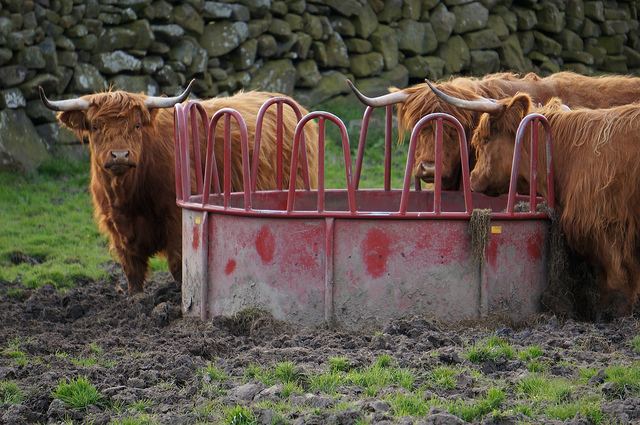

In [30]:
image = Image.open(BASE_IMG + "COCO_train2014_" + str(item.image_id).zfill(12) + ".jpg")
display(image)

In [39]:
import torchvision.transforms as T

def img_preprocess(image: Image, n_px: int = 224, grid_px: int = 14):
    resized = T.Resize(n_px, interpolation=Image.BICUBIC)(image)
    crop = T.CenterCrop(n_px)(resized)

    grid = T.Resize(grid_px, interpolation=Image.BICUBIC)(crop)
    arr = torch.tensor(np.asarray(grid))

    return arr

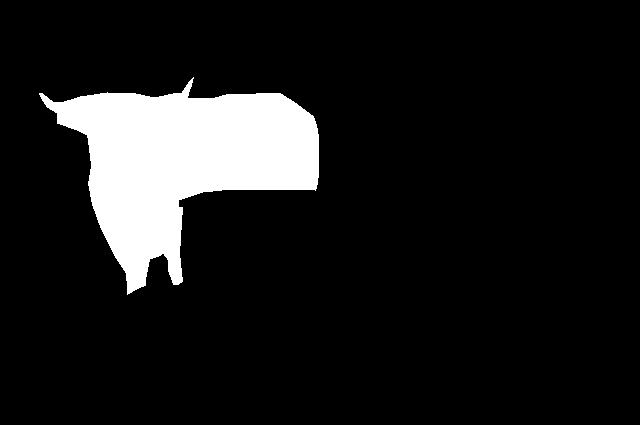

In [32]:
# Draw segmentation
mask = Image.new("L", image.size)
draw = ImageDraw.Draw(mask)
draw.polygon(item.segmentation[0], fill="white", width=0)
display(mask)

In [33]:
import matplotlib.pyplot as plt

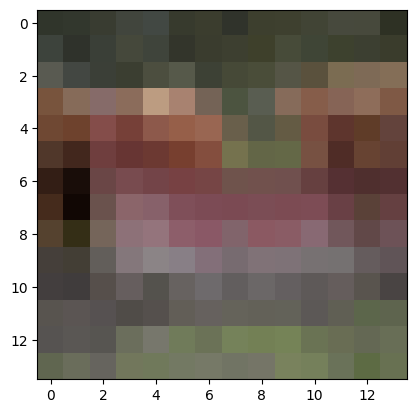

In [41]:
plt.imshow(img_preprocess(image))

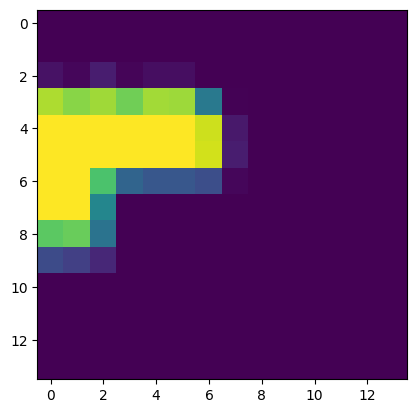

In [40]:

plt.imshow(img_preprocess(mask))

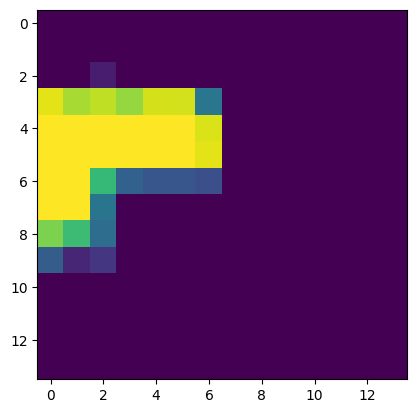

In [53]:
plt.imshow(arr)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.07843137, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.96078431, 0.87058824, 0.90588235, 0.84313725, 0.9372549 ,
        0.93333333, 0.39215686, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.94509804, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.        , 1. 

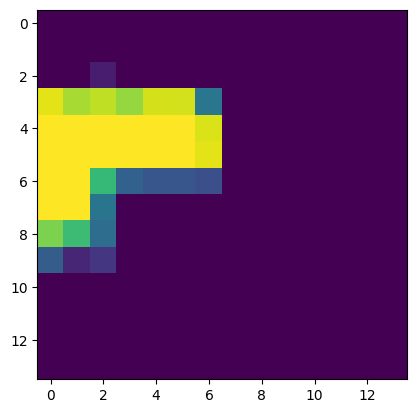

In [54]:
x_norm = (arr-np.min(arr))/(np.max(arr)-np.min(arr))
display(x_norm)
plt.imshow(x_norm)